# Logistic Regression Lab Activity

By Mwanje Musa

In [79]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline
import matplotlib.pyplot as plt

In [80]:
churn_df =pd.read_csv("ChurnData.csv")

In [81]:
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [82]:
churn_df.tail()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
195,55.0,44.0,24.0,83.0,1.0,23.0,0.0,1.0,0.0,17.35,...,0.0,0.0,0.0,1.0,0.0,2.854,3.199,4.419,3.0,0.0
196,34.0,23.0,3.0,24.0,1.0,7.0,0.0,1.0,0.0,6.00,...,0.0,0.0,1.0,1.0,0.0,1.792,3.332,3.178,3.0,0.0
197,6.0,32.0,10.0,47.0,1.0,10.0,0.0,1.0,0.0,3.85,...,0.0,0.0,1.0,1.0,0.0,1.348,3.168,3.850,3.0,0.0
198,24.0,30.0,0.0,25.0,4.0,5.0,0.0,1.0,1.0,8.70,...,1.0,1.0,1.0,1.0,1.0,2.163,3.866,3.219,4.0,1.0
199,61.0,50.0,16.0,190.0,2.0,22.0,1.0,1.0,1.0,16.85,...,0.0,1.0,0.0,0.0,1.0,2.824,3.240,5.247,2.0,0.0


Data pre-processing and selection

In [83]:
churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ','equip', 'callcard', 'wireless','churn']]
churn_df['churn'] = churn_df['churn'].astype('int')
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


In [84]:
churn_df.shape

(200, 10)

In [85]:
X = np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ','equip']])
X[0:5]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.]])

In [86]:
y = np.asarray(churn_df['churn'])
y [0:5]

array([1, 1, 0, 0, 0])

In [87]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.14, -0.63, -0.46,  0.48,  1.7 , -0.58, -0.86],
       [-0.12, -0.63,  0.03, -0.33, -0.64, -1.14, -0.86],
       [-0.58, -0.86, -0.26, -0.35, -1.42, -0.92, -0.86],
       [ 0.12, -0.47, -0.66,  0.01, -0.64, -0.03,  1.16],
       [-1.32, -0.47,  0.23,  0.04, -0.64,  0.53, -0.86]])

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2,random_state=4)
print ('Train set:', X_train.shape, y_train.shape)
print ('Test set:', X_test.shape, y_test.shape)

Train set: (160, 7) (160,)
Test set: (40, 7) (40,)


In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [90]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

In [91]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.54, 0.46],
       [0.61, 0.39],
       [0.56, 0.44],
       [0.63, 0.37],
       [0.56, 0.44],
       [0.55, 0.45],
       [0.52, 0.48],
       [0.61, 0.39],
       [0.41, 0.59],
       [0.63, 0.37],
       [0.58, 0.42],
       [0.63, 0.37],
       [0.48, 0.52],
       [0.43, 0.57],
       [0.66, 0.34],
       [0.55, 0.45],
       [0.52, 0.48],
       [0.49, 0.51],
       [0.49, 0.51],
       [0.52, 0.48],
       [0.62, 0.38],
       [0.53, 0.47],
       [0.64, 0.36],
       [0.52, 0.48],
       [0.51, 0.49],
       [0.71, 0.29],
       [0.55, 0.45],
       [0.52, 0.48],
       [0.52, 0.48],
       [0.71, 0.29],
       [0.68, 0.32],
       [0.51, 0.49],
       [0.42, 0.58],
       [0.71, 0.29],
       [0.6 , 0.4 ],
       [0.64, 0.36],
       [0.4 , 0.6 ],
       [0.52, 0.48],
       [0.66, 0.34],
       [0.51, 0.49]])

jaccard Index

In [92]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat)

0.375

confusion matrix

In [93]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [94]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix', 
                          cmap=plt.cm.Blues):
#This function prints and plots the confusion matrix.
#Normalization can be applied by setting `normalize=True`.

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        print(cm)
        
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 6  9]
 [ 1 24]]


In [95]:
# Compute confusion matrix

              precision    recall  f1-score   support

           0       0.73      0.96      0.83        25
           1       0.86      0.40      0.55        15

    accuracy                           0.75        40
   macro avg       0.79      0.68      0.69        40
weighted avg       0.78      0.75      0.72        40

Confusion matrix, without normalization
[[24  1]
 [ 9  6]]


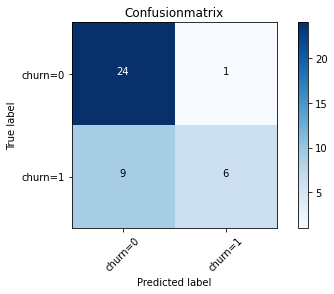

In [96]:
cnf_matrix = confusion_matrix(y_test, yhat)
np.set_printoptions(precision=2)
print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=0','churn=1'],normalize= False, title='Confusionmatrix')

# Decision Tree Algorithm Classifier

In [97]:
!pip install six

In [98]:
!pip install pydotplus

In [99]:
from six import StringIO

In [100]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [101]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [102]:
TelecomTree = DecisionTreeClassifier(criterion="entropy", max_depth = 7)
TelecomTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [103]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import StandardScaler 
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.14, -0.63, -0.46,  0.48,  1.7 , -0.58, -0.86],
       [-0.12, -0.63,  0.03, -0.33, -0.64, -1.14, -0.86],
       [-0.58, -0.86, -0.26, -0.35, -1.42, -0.92, -0.86],
       [ 0.12, -0.47, -0.66,  0.01, -0.64, -0.03,  1.16],
       [-1.32, -0.47,  0.23,  0.04, -0.64,  0.53, -0.86]])

In [104]:
TelecomTree.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

Prediction

In [105]:
predTree = TelecomTree.predict(X_test)

In [106]:
print (predTree [0:5])
print (y_test [0:5])

[0 0 1 0 0]
[0 0 1 0 1]


Evaluation

In [107]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [108]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.875


In [109]:
yhat_tree=TelecomTree.predict(X_test)
tree_jacc_test=metrics.jaccard_score(y_test, yhat_tree)
tree_f1_test=metrics.f1_score(y_test, yhat_tree, average ='macro')
tree_cnf_matrix = confusion_matrix(y_test, yhat_tree)
print("Accuracy is ", tree_jacc_test, " F1 is" , tree_f1_test)
print(classification_report(y_test, yhat_tree))
tree_cnf_matrix


Accuracy is  0.6875  F1 is 0.8602375960866526
              precision    recall  f1-score   support

           0       0.86      0.96      0.91        25
           1       0.92      0.73      0.81        15

    accuracy                           0.88        40
   macro avg       0.89      0.85      0.86        40
weighted avg       0.88      0.88      0.87        40



array([[24,  1],
       [ 4, 11]])

In [110]:
df.dtypes

tenure      float64
age         float64
address     float64
income      float64
ed          float64
employ      float64
equip       float64
callcard    float64
wireless    float64
longmon     float64
tollmon     float64
equipmon    float64
cardmon     float64
wiremon     float64
longten     float64
tollten     float64
cardten     float64
voice       float64
pager       float64
internet    float64
callwait    float64
confer      float64
ebill       float64
loglong     float64
logtoll     float64
lninc       float64
custcat     float64
churn       float64
dtype: object

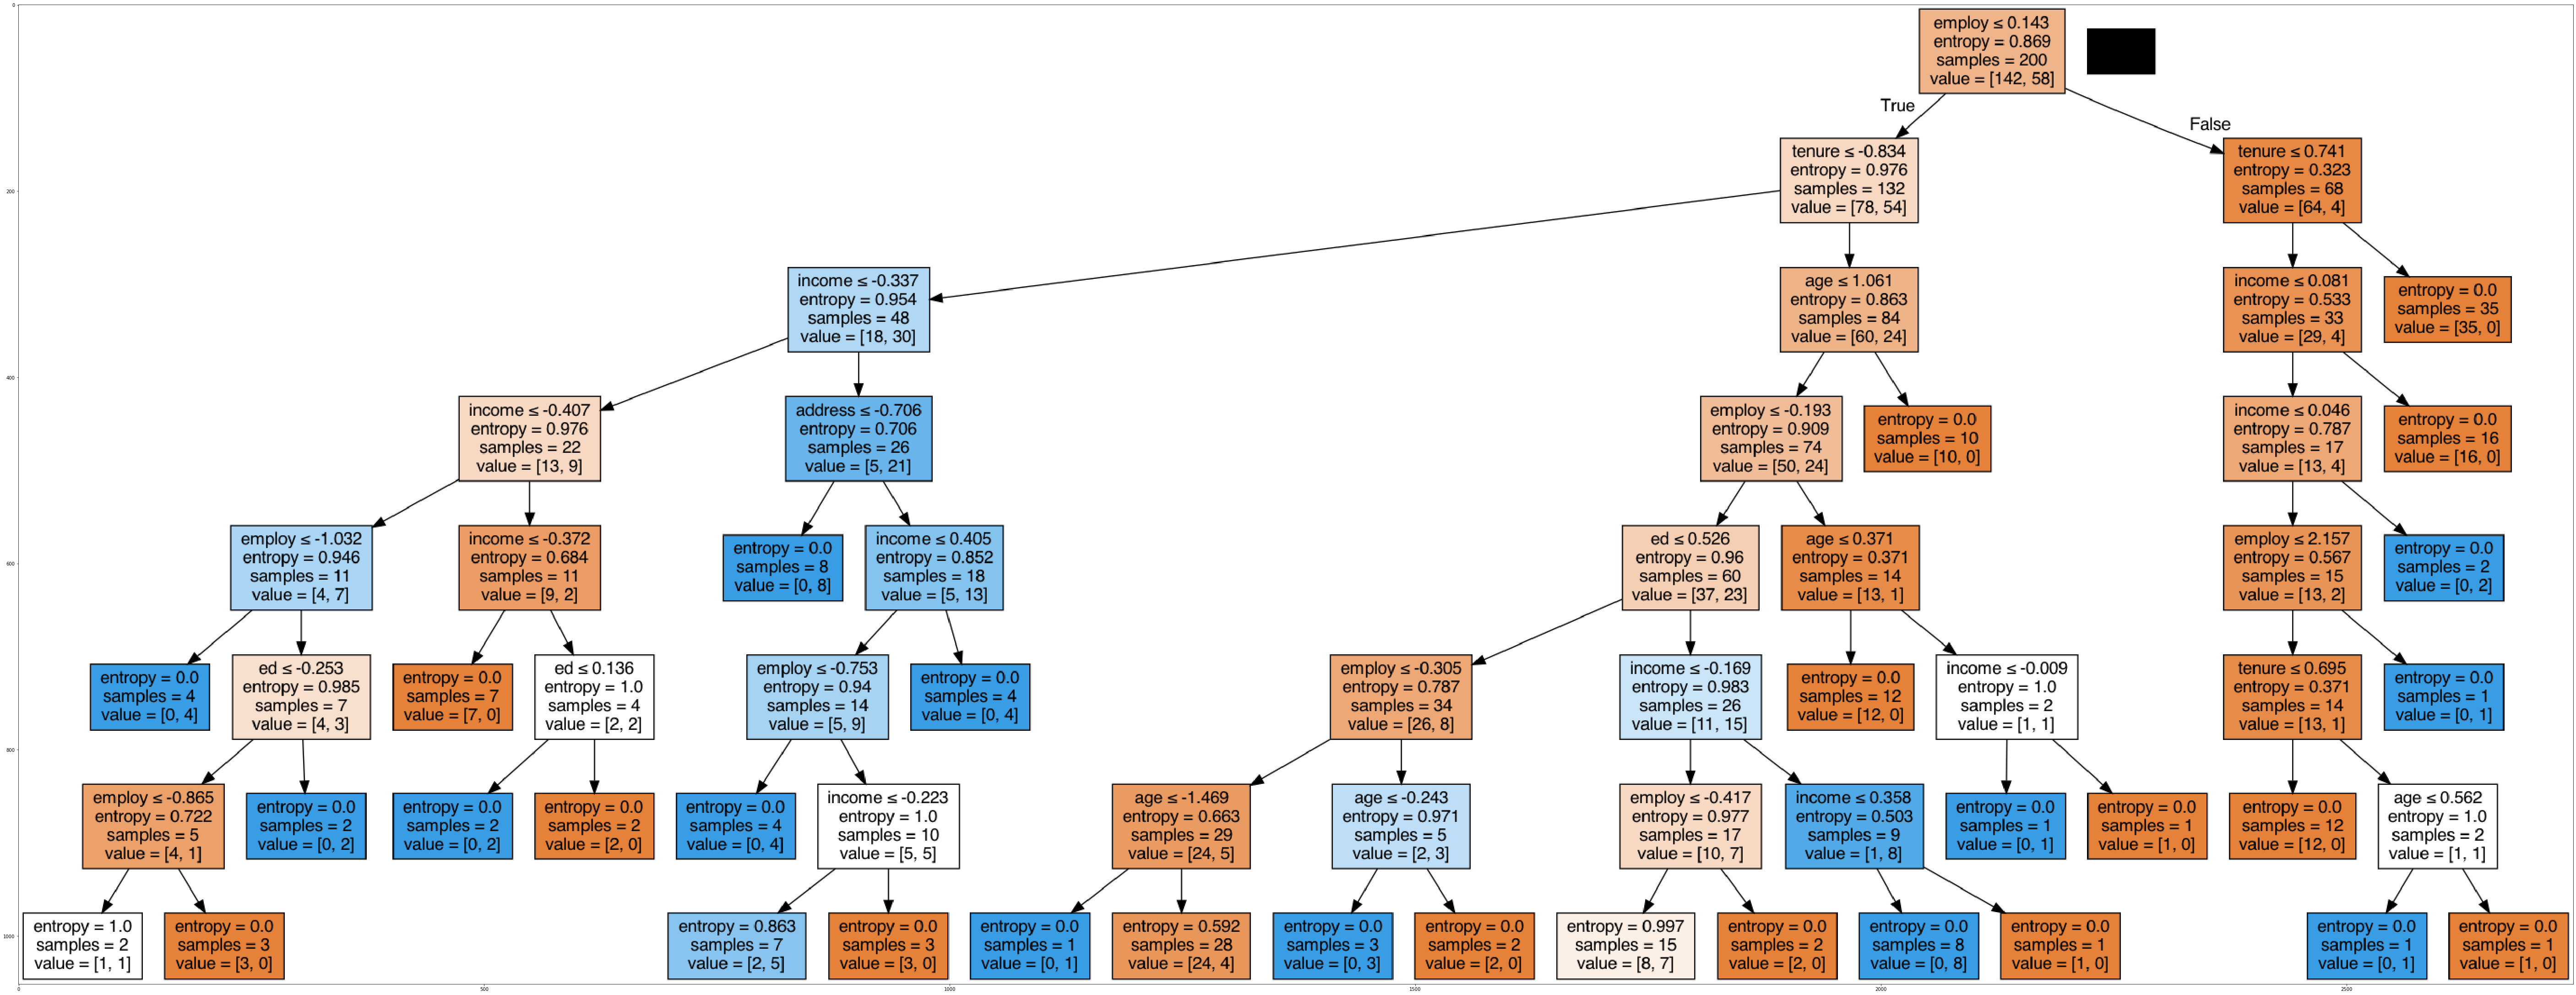

In [111]:
dot_data = StringIO()
filename = "TelecomTree.png"
featureNames = churn_df.columns[0:7]
targetNames = churn_df["churn"].unique().tolist()
out=tree.export_graphviz(TelecomTree,feature_names=featureNames,out_file=dot_data, filled=True,special_characters=True,rotate=False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

# Support Vector Machine

In [112]:
from sklearn import svm
EVDSVM = svm.SVC(kernel='rbf')
EVDSVM.fit(X, y)

SVC()

In [113]:
yhat_svm=EVDSVM.predict(X)
svm_jacc_test=metrics.jaccard_score(y, yhat_svm)
svm_f1_test=metrics.f1_score(y, yhat_svm, average ='macro')
svm_cnf_matrix = confusion_matrix(y, yhat_svm)
print("Accuracy is ", svm_jacc_test, " F1 is" , svm_f1_test)
print(classification_report(y, yhat_svm))
svm_cnf_matrix

Accuracy is  0.3382352941176471  F1 is 0.6799317187666702
              precision    recall  f1-score   support

           0       0.79      0.93      0.85       142
           1       0.70      0.40      0.51        58

    accuracy                           0.78       200
   macro avg       0.74      0.66      0.68       200
weighted avg       0.76      0.78      0.75       200



array([[132,  10],
       [ 35,  23]])

In [114]:
#K Nearest Neighbor(KNN)
#Split the initial train set in train and cross validation set. Use 80% of the data set for training and 20% for cross validation
from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Cross validation set:', X_cv.shape,  y_cv.shape)

Train set: (160, 7) (160,)
Cross validation set: (40, 7) (40,)


In [115]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [116]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [117]:
#Find the best k by training and predicting
#Train the model for various k between 1 and 9 and choose the one with the best accuracy on the cross validation set.
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model   
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
#Predict on the Cross Validation set
    yhat_cv=neigh.predict(X_cv)
    #Calculate 
    mean_acc[n-1] = metrics.accuracy_score(y_cv, yhat_cv)

    
    std_acc[n-1]=np.std(yhat_cv==y_cv)/np.sqrt(yhat_cv.shape[0])

mean_acc

array([0.62, 0.7 , 0.7 , 0.7 , 0.72, 0.75, 0.7 , 0.78, 0.75])

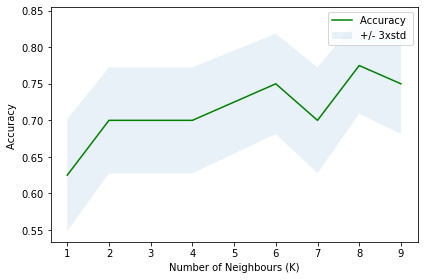

The best accuracy was 0.775 with k= 8


In [118]:
#Display the accuracy of the model for the various K
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbours (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was", mean_acc.max(), "with k=", mean_acc.argmax()+1)

In [119]:
#Now generate and store the model on the global train set for the optimal k = 5.
neigh = KNeighborsClassifier(n_neighbors = mean_acc.argmax()+1).fit(X, y)
neigh

KNeighborsClassifier(n_neighbors=8)

In [120]:
#KNN Evaluation

#Jaccard index for accuracy evaluation.

from sklearn.metrics import jaccard_score
jaccard_score( y_cv,  yhat_cv)

0.375

In [121]:
#Calculate accuracy and F1 for KNN algorithm

#yhat_test=neigh.predict(X_test)
kn_jacc_test=metrics.jaccard_score(y_cv,  yhat_cv)
kn_f1_test=metrics.f1_score(y_cv,  yhat_cv, average ='macro')
kn_cnf_matrix = confusion_matrix(y_cv,  yhat_cv)
print("Accuracy is ", kn_jacc_test, " F1 is" , kn_f1_test)
print(classification_report(y_cv,  yhat_cv))
kn_cnf_matrix

Accuracy is  0.375  F1 is 0.6865203761755486
              precision    recall  f1-score   support

           0       0.73      0.96      0.83        25
           1       0.86      0.40      0.55        15

    accuracy                           0.75        40
   macro avg       0.79      0.68      0.69        40
weighted avg       0.78      0.75      0.72        40



array([[24,  1],
       [ 9,  6]])